# Compare different lifetime fits 

### JAH 04/08/18

<i>
This NB shows the comparison between different fits (binned and un-binned) lifetime fits with MC
</i>

In [1]:
import time
print("Last updated on ", time.asctime())

Last updated on  Sat Aug  4 22:29:39 2018


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Notebook configuration

### Imports

In [3]:
import os
import time
import random

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt

import scipy.stats       as stats

import invisible_cities.core.fit_functions as fitf

import krcal.core.fit_functions            as icarofitf
import krcal.utils.hst_extend_functions   as hst
import krcal.dev.akr_functions            as akr

#from   invisible_cities.evm  .ic_containers  import Measurement

In [4]:
# Plotting style
import matplotlib as mpl

default_cmap = "jet"
mpl.rcParams['figure.figsize']  = 10, 8
mpl.rcParams['font.size']    = 14


In [5]:
Rrange = (0., 180.)
Zrange = (0., 550.)

## Test - MC experiments

### generate experiments

In [6]:
def experiment(nsample=200, e0 = 11e3, tau= 2000., res= 0.05):
    zs = stats.uniform.rvs(0, 550, size=nsample)
    es = e0*np.exp(-zs/tau)
    es = es + res * e0* np.sqrt(e0/es) * stats.norm.rvs(size=nsample)
    return zs, es

mexperiments, nsample = 5000, 200
e0t, taut, rest = 11e3, 2e3, 0.05 # true values (e0, tau, resolution (%))
dats  = [experiment() for i in range(mexperiments)]
zs    = [x[0] for x in dats]
es    = [x[1] for x in dats]

### show some experiments

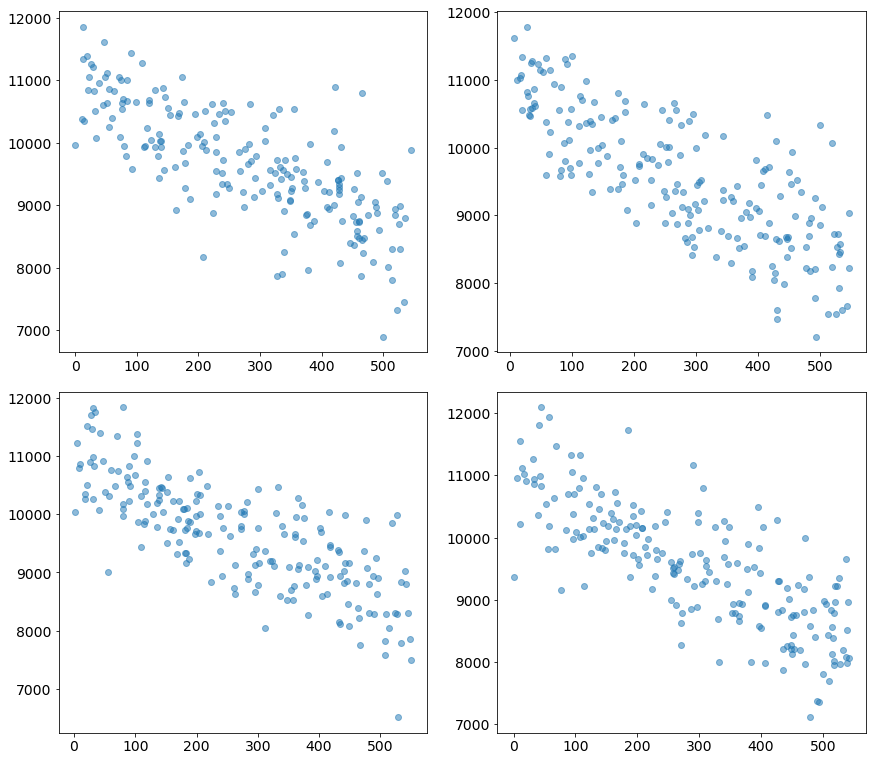

In [7]:
c = hst.Canvas(2, 2)
ks = random.sample(range(mexperiments), 4)
for i,k in enumerate(ks):
    hst.scatter(zs[k], es[k], canvas = c(i+1), alpha=0.5)
plt.tight_layout()

### lsq fit

In [8]:
evals = [akr.lt_lsqfit(dat[0], dat[1]) for dat in dats]

In [9]:
e0s  = np.array([x[0].value       for x in evals])
ue0s = np.array([x[0].uncertainty for x in evals])
lts  = np.array([x[1].value       for x in evals])
ults = np.array([x[1].uncertainty for x in evals])
chis = np.array([x[2]             for x in evals])
oks  = np.array([x[3]             for x in evals], dtype = bool)

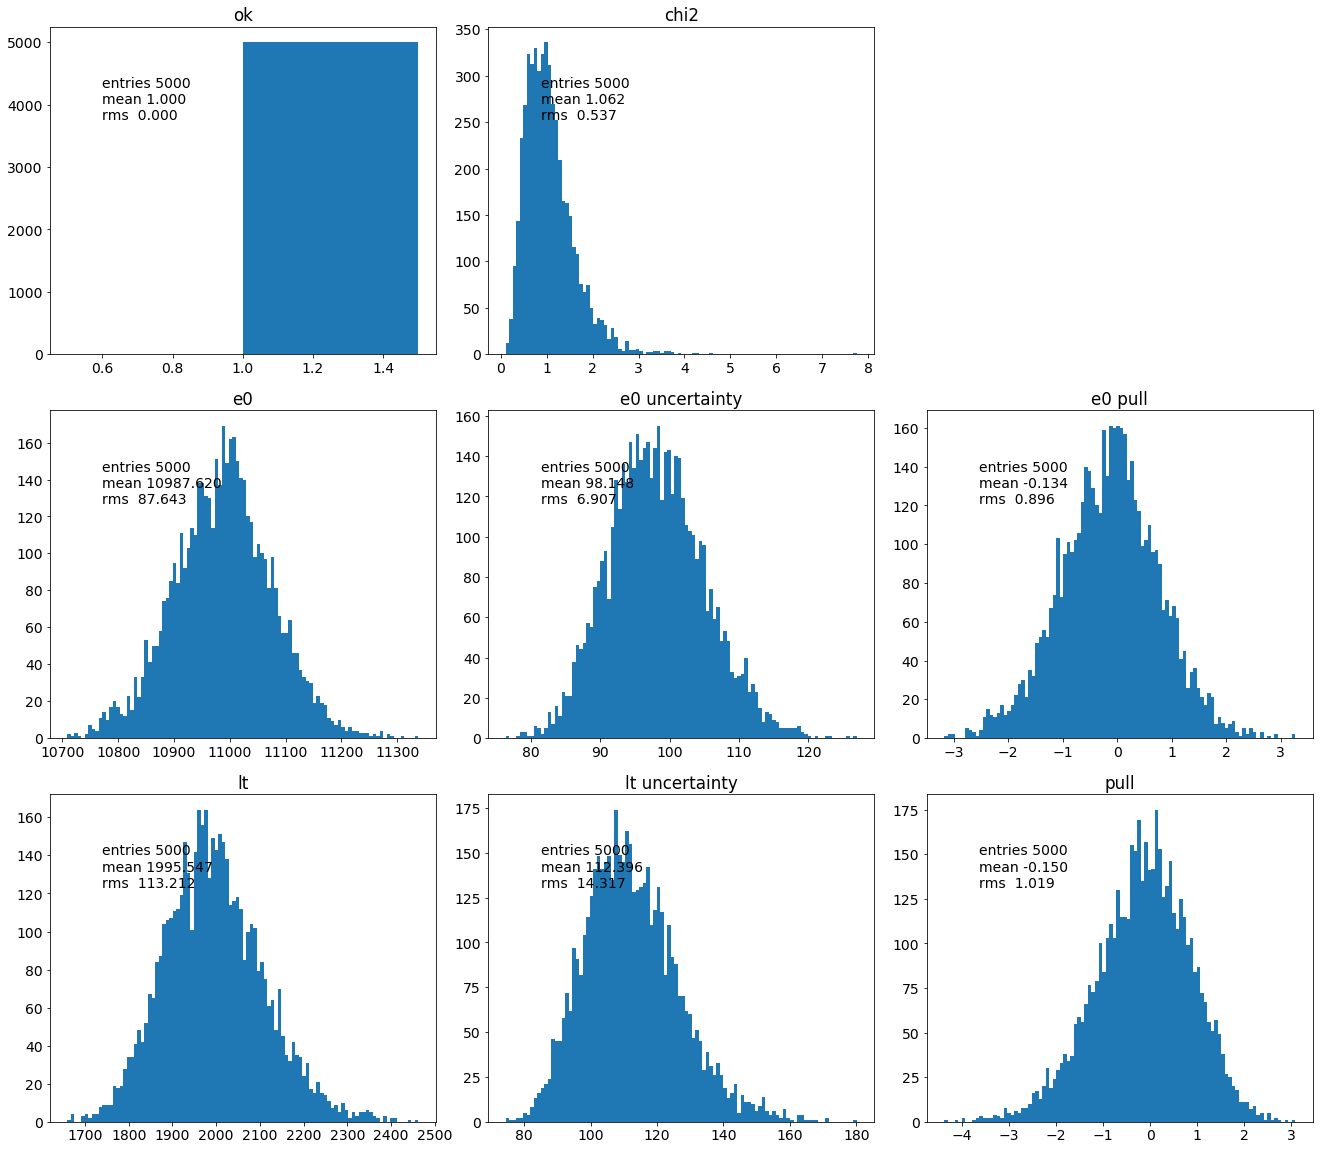

In [10]:
c = hst.Canvas(3, 3)
e0, tau = 11.e3, 1.5e3 
hst.hist(oks            ,   2, canvas = c(1), title = 'ok' )
hst.hist(chis           , 100, canvas = c(2), title = 'chi2');
hst.hist(e0s            , 100, canvas = c(4), title = 'e0');
hst.hist(ue0s           , 100, canvas = c(5), title = 'e0 uncertainty');
hst.hist((e0s-e0t)/ue0s , 100, canvas = c(6), title = 'e0 pull');
hst.hist(lts            , 100, canvas = c(7), title='lt');
hst.hist(ults           , 100, canvas = c(8), title='lt uncertainty')
hst.hist((lts-taut)/ults, 100, canvas = c(9), title = 'pull');
plt.tight_layout()

### profile fit

In [11]:
Znbins, Zrange =  12, ( 0., 550.)
Enbins, Erange = 100, (6e3, 14e3)
fs = [icarofitf.fit_profile_1d_expo(dat[0], dat[1], Znbins) for dat in dats]

In [12]:
e0s  = np.array([ fi.values[0] for fi in fs])
ue0s = np.array([ fi.errors[0] for fi in fs])
lts  = np.array([-fi.values[1] for fi in fs])
ults = np.array([ fi.errors[1] for fi in fs])
chis = np.array([ fi.chi2      for fi in fs])
oks  = np.array([ fi.chi2>0    for fi in fs], dtype = bool)

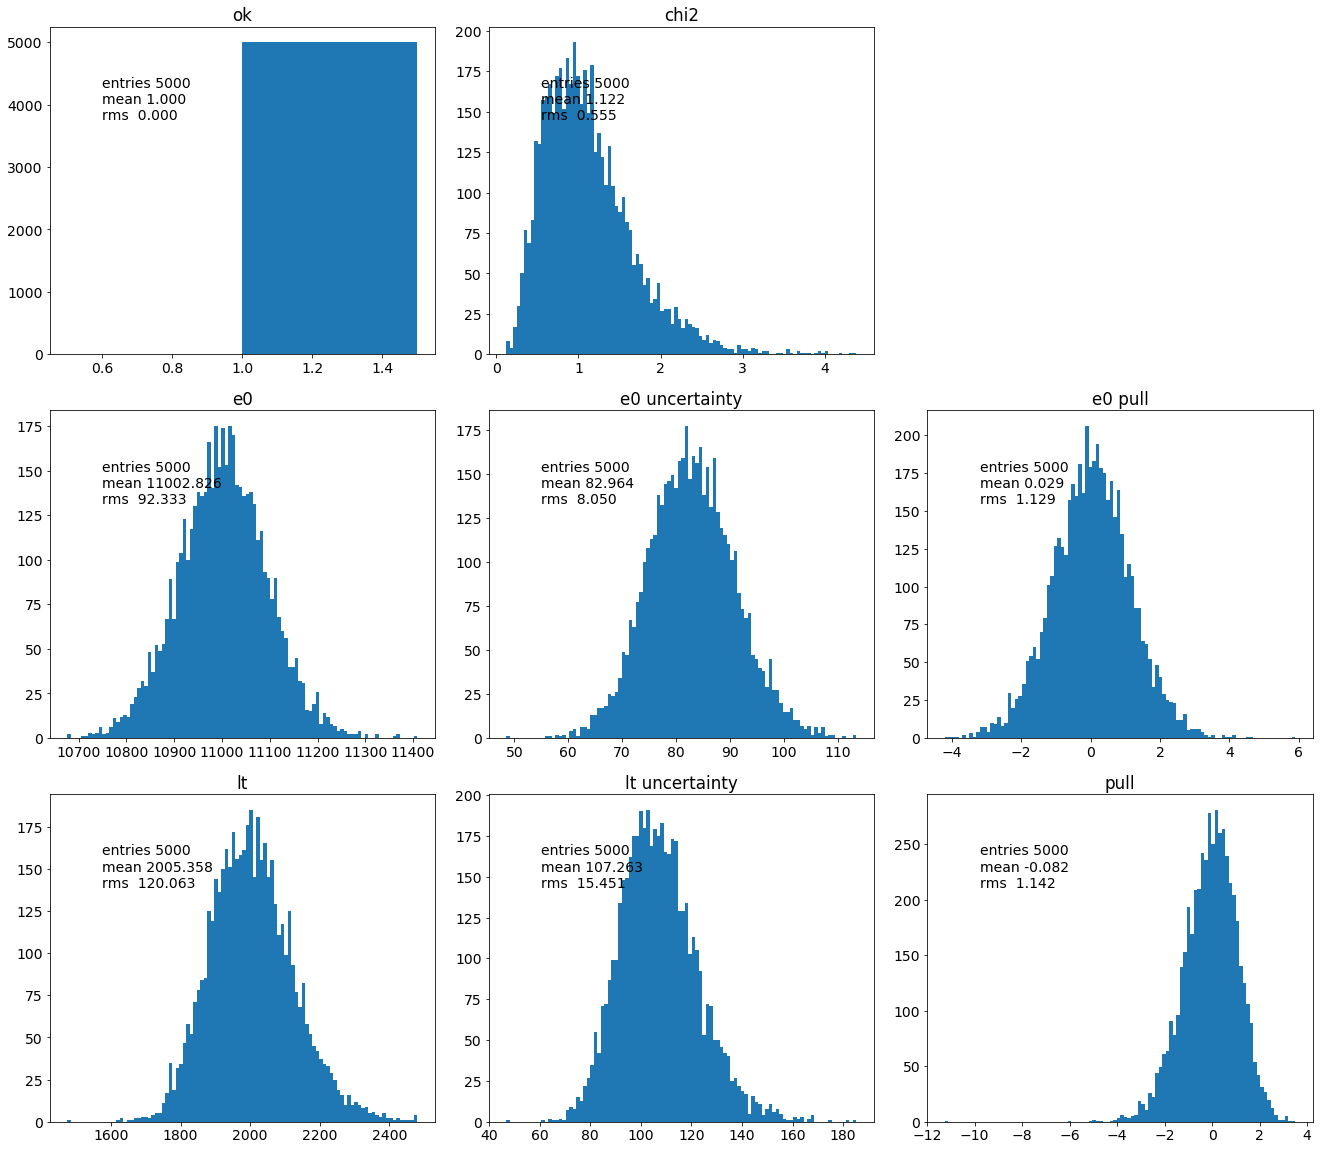

In [13]:
c = hst.Canvas(3, 3)
e0, tau = 11.e3, 1.5e3 
hst.hist(oks            ,   2, canvas = c(1), title = 'ok' )
hst.hist(chis           , 100, canvas = c(2), title = 'chi2');
hst.hist(e0s            , 100, canvas = c(4), title = 'e0');
hst.hist(ue0s           , 100, canvas = c(5), title = 'e0 uncertainty');
hst.hist((e0s-e0t)/ue0s , 100, canvas = c(6), title = 'e0 pull');
hst.hist(lts            , 100, canvas = c(7), title='lt');
hst.hist(ults           , 100, canvas = c(8), title='lt uncertainty')
hst.hist((lts-taut)/ults, 100, canvas = c(9), title = 'pull');
plt.tight_layout()

### Profile is sensitive to the number of bins

In [14]:
Znbins, Zrange =  22, ( 0., 550.)
Enbins, Erange = 100, (6e3, 14e3)
fs = [icarofitf.fit_profile_1d_expo(dat[0], dat[1], Znbins) for dat in dats]

/Users/hernando/investigacion/NEXT/work/KrCalib/krcal/core/fit_functions.py:77: RuntimeWarning: invalid value encountered in greater
  valid_points = yu > 0


In [15]:
e0s  = np.array([ fi.values[0] for fi in fs])
ue0s = np.array([ fi.errors[0] for fi in fs])
lts  = np.array([-fi.values[1] for fi in fs])
ults = np.array([ fi.errors[1] for fi in fs])
chis = np.array([ fi.chi2      for fi in fs])
oks  = np.array([ fi.chi2>0    for fi in fs], dtype = bool)

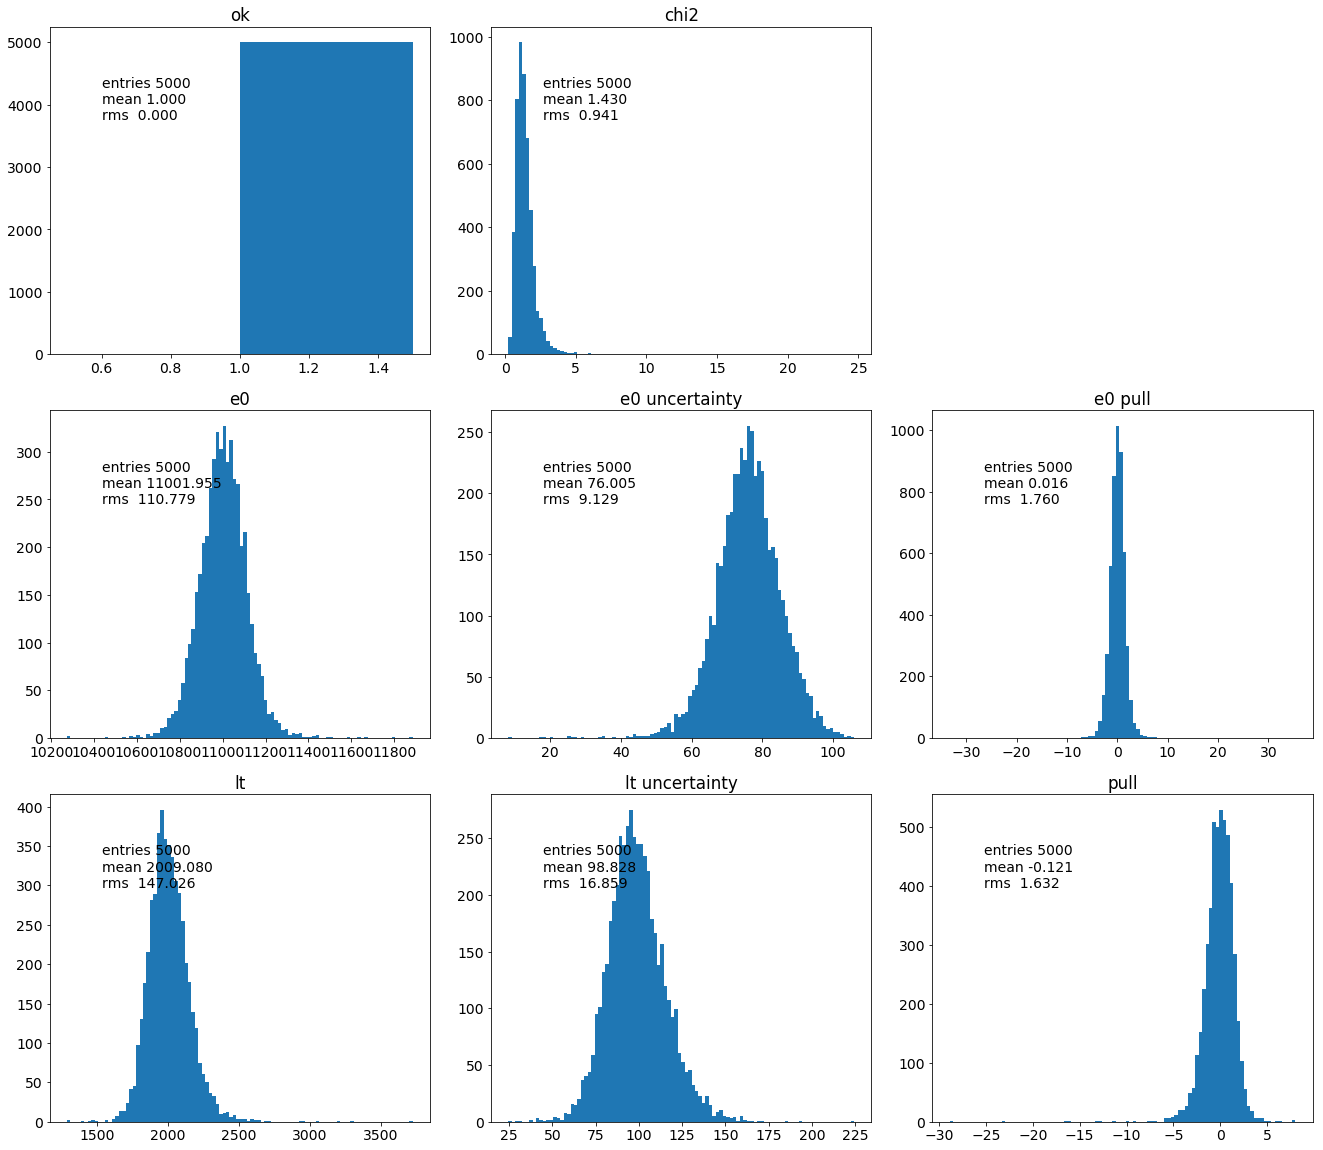

In [16]:
c = hst.Canvas(3, 3)
e0, tau = 11.e3, 1.5e3 
hst.hist(oks            ,   2, canvas = c(1), title = 'ok' )
hst.hist(chis           , 100, canvas = c(2), title = 'chi2');
hst.hist(e0s            , 100, canvas = c(4), title = 'e0');
hst.hist(ue0s           , 100, canvas = c(5), title = 'e0 uncertainty');
hst.hist((e0s-e0t)/ue0s , 100, canvas = c(6), title = 'e0 pull');
hst.hist(lts            , 100, canvas = c(7), title='lt');
hst.hist(ults           , 100, canvas = c(8), title='lt uncertainty')
hst.hist((lts-taut)/ults, 100, canvas = c(9), title = 'pull');
plt.tight_layout()

In [17]:
print('Done!')

Done!
